# 23. Polynomial Regression

 - When data is not following any linearity
 - Polynomial regression is a regression algorithm that models the relationshi between a dependent(y)and independent variable(x) as nth degree polynomial
 - **Y = b0 + b1x1 + b2x1^2 + b3x1^3 + .... + bnx1^n**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv(r'Data/polynomial.csv')
dataset.head(3)

,Level,Salary
0,1,45000
1,2,50000
2,3,60000


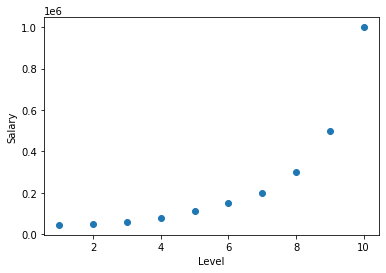

In [8]:
plt.scatter(dataset["Level"], dataset["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

- So this graph is showing that data is not linear

![](Images/polynomial-vs-linear-regression.jpg)

**To check correlation**

In [6]:
dataset.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


**Separate data into input and output**

In [9]:
# Remember that data should be multidimensional
x = dataset[['Level']]
y = dataset['Salary']

**Convert data into polynomial nature**

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
# Change the degree to 2 and so on, depend on your need, to make the model more accurate
pf = PolynomialFeatures(degree=2)
pf.fit(x)
x = pf.transform(x)
x

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
        4.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 1.000e+00, 3.000e+00, 9.000e+00, 1.000e+00, 3.000e+00,
        9.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 1.000e+00, 4.000e+00, 1.600e+01, 1.000e+00, 4.000e+00,
        1.600e+01, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 1.000e+00, 5.000e+00, 2.500e+01, 1.000e+00, 5.000e+00,
        2.500e+01, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 1.000e+00, 6.000e+00, 3.600e+01, 1.000e+00, 6.000e+00,
        3.600e+01, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+00, 7.000e+00, 4.900e+01, 1.000e+00, 7.000e+00,
        4.900e+01, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 1.000e+00, 8.000e+00, 6.400e+01, 1.000e+00, 8.000e+00,
        6.400e+01, 6.400e+01, 5.120e+

**Split data into train and test**

In [13]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

**Build model using polynomial regression**

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**Check model accuracy**

In [22]:
lr.score(x_test, y_test)*100

76.66492889299911

**Draw Prediction Line**

In [23]:
pred = lr.predict(x)
pred

array([114155.94968909,  38027.48728095,   2903.12323346,   8782.85754664,
        55666.69022046, 143554.62125495, 272446.65065008, 442342.77840588,
       653243.00452233, 905147.32899944])

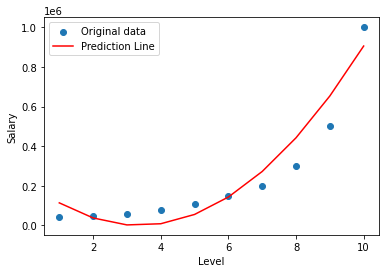

In [26]:
plt.scatter(dataset["Level"], dataset["Salary"])
plt.plot(dataset['Level'], pred, c='red')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend(["Original data", "Prediction Line"])
plt.show()

**Remember, before testing any data, you have to convert it into polynomial feature**, then use it for predcition, like below:

In [29]:
test = pf.transform([[9]])
test

C:\Users\rashi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[ 1.,  9., 81.]])

In [30]:
lr.predict(test)

array([653243.00452233])

**Beware of overfitting / underfitting, your model should not be that much accurate, so it go to overfitting** - rahter it should be best fit